# Data Exploration dan Preprocessing

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
loan=pd.read_csv(r"/content/loan.csv")  #baca dataset loan.csv, state sbg dataframe loan
loan.head(100)                          #output headline dataframe loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
numeric_features = loan.select_dtypes(include = ['int64', 'float64']).columns
categorical_features = loan.iloc[:, 0:12].select_dtypes(include = ['object']).columns

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Categorical features: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

In [ ]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
for col in categorical_columns :
    loan[col].fillna(loan[col].mode()[0],inplace=True)
for col in numerical_columns :
    loan[col].fillna(loan[col].mean(),inplace=True)

In [ ]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


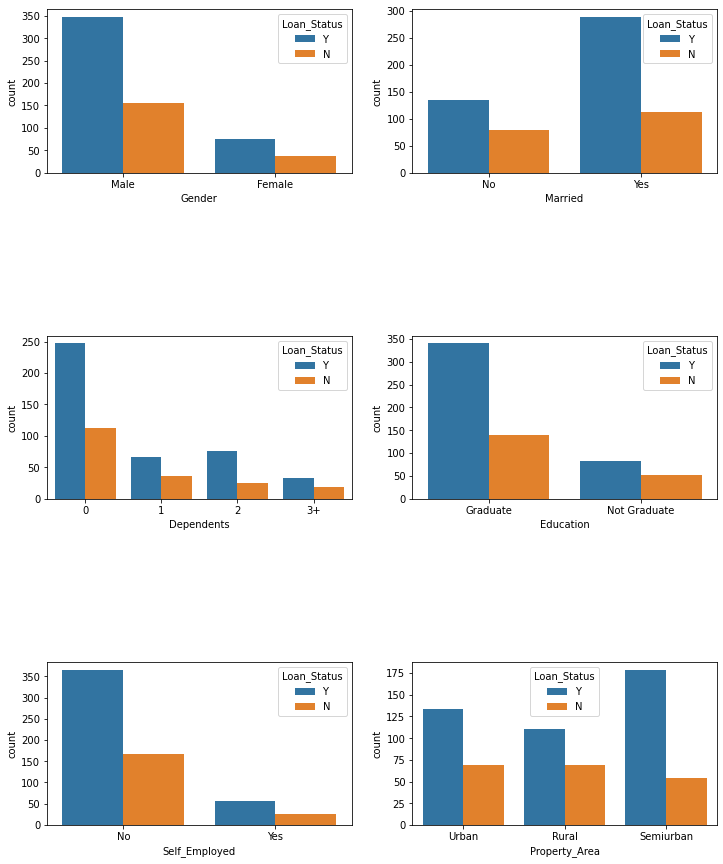

In [ ]:
fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

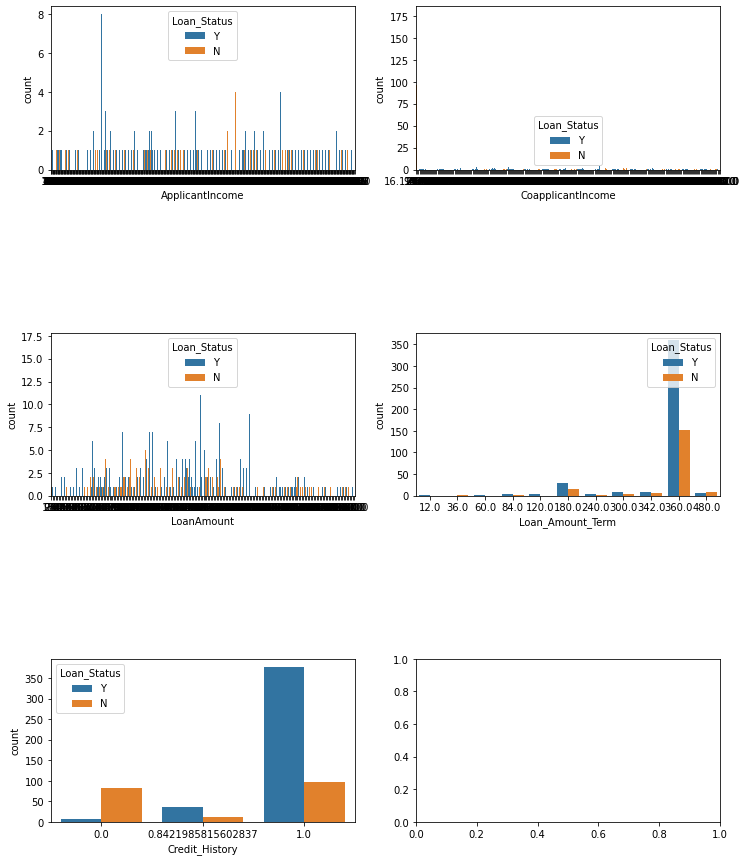

In [ ]:
fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx,cat_col in enumerate(numerical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

In [ ]:
loancorr = loan.corr()
loancorr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


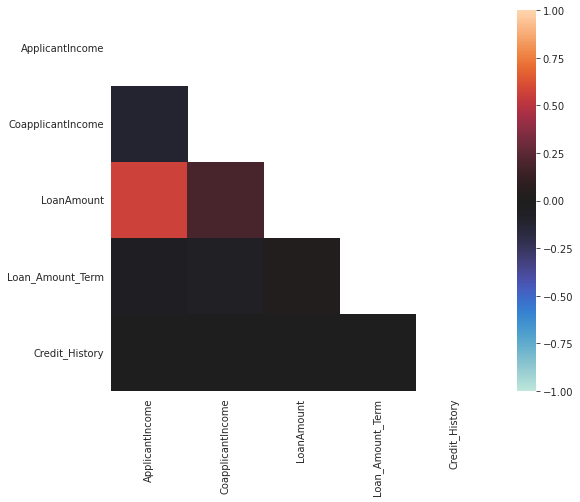

In [ ]:
mask = np.zeros_like(loancorr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(loancorr, mask=mask, vmax=1, vmin=-1, square=True, center=0)

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
x=loan.iloc[:,np.r_[1:6,8:11]].values
y=loan.iloc[:,12].values
x

array([['Male', 'No', '0', ..., 146.41216216216216, 360.0, 1.0],
       ['Male', 'Yes', '1', ..., 128.0, 360.0, 1.0],
       ['Male', 'Yes', '0', ..., 66.0, 360.0, 1.0],
       ...,
       ['Male', 'Yes', '1', ..., 253.0, 360.0, 1.0],
       ['Male', 'Yes', '2', ..., 187.0, 360.0, 1.0],
       ['Female', 'No', '0', ..., 133.0, 360.0, 0.0]], dtype=object)

In [ ]:
x.shape
y.shape

(614,)

In [ ]:
from sklearn .model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_X=LabelEncoder()

In [ ]:
for i in range(0,5):
    x_train[:,i]=LabelEncoder_X.fit_transform(x_train[:,i])
x_train[:,7]=LabelEncoder_X.fit_transform(x_train[:,7])

In [ ]:
x_train.shape

(491, 8)

In [ ]:
labelEncoder_Y=LabelEncoder()
y_train=labelEncoder_Y.fit_transform(y_train)

In [ ]:
y_train.shape

(491,)

In [ ]:
for i in range(0,5):
    x_test[:,i]=LabelEncoder_X.fit_transform(x_test[:,i])
x_test[:,7]=LabelEncoder_X.fit_transform(x_test[:,7])
x_test.shape

(123, 8)

In [ ]:
y_test=labelEncoder_Y.fit_transform(y_test)
y_test.shape

(123,)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

# Pemodelan Klasifikasi Biasa

In [ ]:
logreg = LogisticRegression()             
svmc = SVC()                              
decisiontree = DecisionTreeClassifier()   

In [ ]:
#cek cross value score dari data yang memiliki korelasi paling tinggi
print(cross_val_score(logreg, x_train, y_train, cv=5, scoring='f1').sum()/5)
print(cross_val_score(decisiontree, x_train, y_train, cv=5, scoring='f1').sum()/5)
print(cross_val_score(svmc, x_train, y_train, cv=5, scoring='f1').sum()/5)

0.8474097737315818
0.7804157593854332
0.859973328624889


In [ ]:
logreg_par= {'C':[0.01,0.05,0.1,0.5,0.7,1,5,10,50,100]}   
decisiontree_par = {'criterion':['gini', 'entropy'],      
                  'max_depth':[3,4,5,6]}                  
svmc_par = {'C':[0.01,0.05,0.1,0.7,0.5,1,5,10,50,100],    
             'kernel':['poly','rbf']}                     

for model, params in zip([logreg, decisiontree, svmc], [logreg_par, decisiontree_par, svmc_par]):
  gridsearch = GridSearchCV(model, params, cv=5, scoring='f1')     
  gridsearch.fit(x_train, y_train)                                 
  print(gridsearch.best_params_, gridsearch.cv_results_['mean_test_score'].max()) 

{'C': 0.01} 0.8661305577475519
{'criterion': 'gini', 'max_depth': 3} 0.8505399952160515
{'C': 0.5, 'kernel': 'rbf'} 0.8607030469625698


a. Evaluasi Model Logistik Regression

In [ ]:
logreg = LogisticRegression(C=0.01) 
logreg.fit(x_train, y_train)        
yhat = logreg.predict(x_test)       
accuracy_score(y_test, yhat)        

0.8455284552845529

In [ ]:
f1_score(y_test, yhat) 

0.9045226130653267

In [ ]:
print (classification_report(y_test, yhat)) 

              precision    recall  f1-score   support

           0       0.93      0.44      0.60        32
           1       0.83      0.99      0.90        91

    accuracy                           0.85       123
   macro avg       0.88      0.71      0.75       123
weighted avg       0.86      0.85      0.82       123



b. Evaluasi Model Decision Tree

In [ ]:
loantree = DecisionTreeClassifier(criterion='gini',max_depth=3)   
loantree.fit(x_train, y_train)                   
predTree = loantree.predict(x_test)                                                      

In [ ]:
accuracy_score(y_test, predTree)  

0.8455284552845529

In [ ]:
f1_score(y_test, predTree)  

0.9045226130653267

In [ ]:
print (classification_report(y_test, predTree)) 

              precision    recall  f1-score   support

           0       0.93      0.44      0.60        32
           1       0.83      0.99      0.90        91

    accuracy                           0.85       123
   macro avg       0.88      0.71      0.75       123
weighted avg       0.86      0.85      0.82       123



c. Evaluasi Model SVM

In [ ]:
svmc = SVC(C=0.5, kernel='rbf')   

In [ ]:
svmc.fit(x_train, y_train)        

SVC(C=0.5)

In [ ]:
Ypredict = svmc.predict(x_test)                          

In [ ]:
accuracy_score(y_test, Ypredict)  

0.8536585365853658

In [ ]:
f1_score(y_test, Ypredict)       

0.9099999999999999

In [ ]:
print (classification_report(y_test, Ypredict)) 

              precision    recall  f1-score   support

           0       1.00      0.44      0.61        32
           1       0.83      1.00      0.91        91

    accuracy                           0.85       123
   macro avg       0.92      0.72      0.76       123
weighted avg       0.88      0.85      0.83       123



#Tuning Hyperparameter Neural Networks

In [ ]:
import numpy as np
import keras
import tensorflow as tf
!pip install -q -U keras-tuner

import keras_tuner as kt

     |████████████████████████████████| 133 kB 9.4 MB/s 


In [ ]:
x_valid, x_train= x_train[:18],x_train[18:]
y_valid, y_train= y_train[:18],y_train[18:]

In [ ]:
def build_model(hp):
  model=keras.models.Sequential()
  model.add(Dense(8, input_dim=8, activation="relu"))

  hp_layers=hp.Choice('layer',[2,3])
  hp_neurons=hp.Int('neuron', min_value=10,max_value=30,step=10)

  for layers in range(hp_layers):
    model.add(Dense(hp_neurons, activation="relu"))
  model.add(Dense(2,activation="sigmoid"))

  optimizer=tf.keras.optimizers.Adam()
  model.compile(loss= "mse",
              optimizer='adam',
              metrics=['binary_accuracy'])
  
  return model

In [ ]:
from keras.layers import Dense
tuner = kt.RandomSearch(
    build_model,
    objective="binary_accuracy",
    max_trials=5,
    overwrite=True,
    directory="test_search",
    project_name="test_project"
)
tuner.search(
    x_train, y_train, epochs=100,
    validation_data=(x_valid, y_valid),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)]
)

Trial 5 Complete [00h 00m 03s]
binary_accuracy: 0.7843551635742188

Best binary_accuracy So Far: 0.8224101662635803
Total elapsed time: 00h 00m 14s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hps=tuner.get_best_hyperparameters()[0]

print('best number of layers:',best_hps.get('layer'))
print('best number of neurons:',best_hps.get('neuron'))

best number of layers: 3
best number of neurons: 20


#Tuning Model Neural Networks dengan Hyperparameter yang Sudah di Tuning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim=8, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 20)                180       
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 20)                420       
                                                                 
 dense_13 (Dense)            (None, 2)                 42        
                                                                 
Total params: 1,134
Trainable params: 1,134
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
model.compile(loss= "mse",
              optimizer='adam',
              metrics=['binary_accuracy'])
#fit model
history=model.fit(x_train, y_train, epochs=100,
                  validation_data=(x_valid,y_valid))

Epoch 1/100
15/15 [==============================] - 1s 14ms/step - loss: 0.2380 - binary_accuracy: 0.6839 - val_loss: 0.2403 - val_binary_accuracy: 0.6667
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2260 - binary_accuracy: 0.7072 - val_loss: 0.2328 - val_binary_accuracy: 0.6667
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2145 - binary_accuracy: 0.6987 - val_loss: 0.2258 - val_binary_accuracy: 0.6667
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2020 - binary_accuracy: 0.7114 - val_loss: 0.2205 - val_binary_accuracy: 0.6667
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1916 - binary_accuracy: 0.7252 - val_loss: 0.2196 - val_binary_accuracy: 0.6944
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1829 - binary_accuracy: 0.7526 - val_loss: 0.2176 - val_binary_accuracy: 0.7222
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - lo

In [ ]:
model.evaluate(x_train,y_train)

15/15 [==============================] - 0s 1ms/step - loss: 0.1215 - binary_accuracy: 0.8467


[0.12151633203029633, 0.8467230200767517]

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1418 - binary_accuracy: 0.8049


[0.14182114601135254, 0.8048780560493469]

In [ ]:
yprob=model.predict(x_test)
yprob

array([[7.9102963e-01, 7.9238331e-01],
       [2.5060773e-04, 1.0599494e-03],
       [8.5059226e-01, 8.4935224e-01],
       [8.5093749e-01, 8.5176122e-01],
       [7.8823394e-01, 8.0673927e-01],
       [8.8657832e-01, 8.8825029e-01],
       [1.2739557e-01, 1.5406778e-01],
       [8.8899845e-01, 8.7542963e-01],
       [4.4911534e-02, 6.5026879e-02],
       [8.9896142e-01, 8.9533359e-01],
       [7.8995252e-01, 7.9575408e-01],
       [9.1072130e-01, 8.9039135e-01],
       [4.6438041e-01, 4.4675595e-01],
       [8.5446060e-01, 8.5589194e-01],
       [8.0594647e-01, 8.1119096e-01],
       [8.5936594e-01, 8.4946656e-01],
       [9.1017878e-01, 9.0913284e-01],
       [5.2344799e-04, 1.6833842e-03],
       [7.3288393e-01, 7.3067886e-01],
       [9.0894377e-01, 9.1088665e-01],
       [8.1809449e-01, 8.1855506e-01],
       [8.8908517e-01, 8.7531078e-01],
       [8.6239541e-01, 8.6549556e-01],
       [9.0767670e-01, 8.9217043e-01],
       [7.9466093e-01, 7.9556102e-01],
       [8.9933294e-01, 9.

In [ ]:
yp=np.array([np.argmax(i) for i in yprob])
print(yp)

[1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0]


In [ ]:
print(np.array(loan)[yp])

[['LP001003' 'Male' 'Yes' ... 1.0 'Rural' 'N']
 ['LP001003' 'Male' 'Yes' ... 1.0 'Rural' 'N']
 ['LP001002' 'Male' 'No' ... 1.0 'Urban' 'Y']
 ...
 ['LP001003' 'Male' 'Yes' ... 1.0 'Rural' 'N']
 ['LP001003' 'Male' 'Yes' ... 1.0 'Rural' 'N']
 ['LP001002' 'Male' 'No' ... 1.0 'Urban' 'Y']]


#Tuning Model Neural Networks dengan Hyperparameter Neural Networks Berdasarkan Heaten [3]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim=8, activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 7)                 63        
                                                                 
 dense_16 (Dense)            (None, 2)                 16        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
model.compile(loss= "mse",
              optimizer='adam',
              metrics=['binary_accuracy'])
#fit model
history=model.fit(x_train, y_train, epochs=100,
                  validation_data=(x_valid,y_valid))

Epoch 1/100
15/15 [==============================] - 1s 11ms/step - loss: 0.2652 - binary_accuracy: 0.4419 - val_loss: 0.2528 - val_binary_accuracy: 0.5000
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2585 - binary_accuracy: 0.4873 - val_loss: 0.2489 - val_binary_accuracy: 0.5556
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2535 - binary_accuracy: 0.5581 - val_loss: 0.2464 - val_binary_accuracy: 0.6111
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2501 - binary_accuracy: 0.5782 - val_loss: 0.2453 - val_binary_accuracy: 0.6389
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2473 - binary_accuracy: 0.6068 - val_loss: 0.2442 - val_binary_accuracy: 0.5833
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2454 - binary_accuracy: 0.6290 - val_loss: 0.2433 - val_binary_accuracy: 0.5833
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - lo

In [ ]:
model.evaluate(x_train,y_train)

15/15 [==============================] - 0s 1ms/step - loss: 0.1455 - binary_accuracy: 0.8118


[0.1455148607492447, 0.8118393421173096]

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1253 - binary_accuracy: 0.8537


[0.12534064054489136, 0.8536585569381714]

In [ ]:
yprob=model.predict(x_test)
yprob

array([[0.8328447 , 0.8350334 ],
       [0.07383418, 0.04217952],
       [0.8902024 , 0.88622475],
       [0.8933711 , 0.8889451 ],
       [0.7290239 , 0.750121  ],
       [0.8807101 , 0.879898  ],
       [0.63343763, 0.64149165],
       [0.90943336, 0.9033655 ],
       [0.5174885 , 0.58812416],
       [0.70746416, 0.67977107],
       [0.8448051 , 0.76304126],
       [0.90852386, 0.91064197],
       [0.50746953, 0.5622538 ],
       [0.87643814, 0.8739905 ],
       [0.85625875, 0.8849965 ],
       [0.6957805 , 0.6735872 ],
       [0.71457714, 0.6836061 ],
       [0.06763884, 0.03311095],
       [0.71107614, 0.7392384 ],
       [0.8690617 , 0.86915797],
       [0.4367467 , 0.36820567],
       [0.90856415, 0.90263265],
       [0.8857879 , 0.881435  ],
       [0.9030804 , 0.89551866],
       [0.7615073 , 0.7789289 ],
       [0.7370174 , 0.6902802 ],
       [0.78662765, 0.71564466],
       [0.7296254 , 0.6920208 ],
       [0.53562087, 0.5044017 ],
       [0.5812097 , 0.6167911 ],
       [0.

In [ ]:
yp=np.array([np.argmax(i) for i in yprob])
print(yp)

[1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 1 0 1 1 1 0 0 1 0 1 0]


In [ ]:
print(np.array(loan)[yp])

[['LP001003' 'Male' 'Yes' ... 1.0 'Rural' 'N']
 ['LP001002' 'Male' 'No' ... 1.0 'Urban' 'Y']
 ['LP001002' 'Male' 'No' ... 1.0 'Urban' 'Y']
 ...
 ['LP001002' 'Male' 'No' ... 1.0 'Urban' 'Y']
 ['LP001003' 'Male' 'Yes' ... 1.0 'Rural' 'N']
 ['LP001002' 'Male' 'No' ... 1.0 'Urban' 'Y']]
